# LIME Explanations of in-vivo Gastral Images

## Imports

We need to import a set of Keras features, and several image processing and numercial computation libraries.

In [139]:
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread
import numpy as np
import lime
from lime import lime_image




## Constants
The following "constants" (if Python only had constants...) point to the validation data and need to be adjusted depending on the machine that runs the notebook.

In [150]:
validation_path_bleeding = '/Users/timotheuskampik/Downloads/training/validation/bleeding/'
validation_path_non_bleeding = '/Users/timotheuskampik/Downloads/training/validation/nonbleeding/'

## Loading the Model
We load the model we have trained in the *CNN* notebook.

In [154]:
explainer = lime_image.LimeImageExplainer()

with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
   model = keras.models.load_model('model_full.h5')

## Reading in the Validation Images
Now, we read in all images of the validation data set that are labelled as *bleeding*.

In [142]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out) / 2 + 0.5

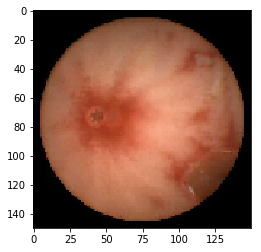

In [152]:
image_paths = []
for _, _, files in os.walk(validation_path_bleeding):
    for file in files:
        image_paths.append(os.path.join(validation_path_bleeding, file))

images = transform_img_fn(image_paths)

## Predicting and Explaining
Finally, we generate the explanations for the images and highlight false negatives.

In [153]:
explanations = []
for image in images:
    explanations.append(explainer.explain_instance(image, model.predict))

In [155]:
model.predict(images)

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.03362617],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.99992394],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [172]:
from skimage.segmentation import mark_boundaries

plt.figure(1, plt.figure(figsize=(100,100)))
index = 0
for explanation in explanations:
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=2, hide_rest=False)
    plt.subplot(20, 20, 1 + index)
    plt.imshow(mark_boundaries(temp, mask))
    index = index + 1
plt.show()